<h3>Guided Project - Clean And Analyze Employee Exit Surveys</h3>

This guided project is to supplement practice for data cleaning, transforming and data combining skills. 

The project involves two datasets: Exit surveys from employees of - the Department of Education, Training and Employment (DETE) and - the Technical and Further Education (TAFE) institute in Queensland, Australia.

The objective of the project is, to answer the following assumed questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Due to lack of a proper data dictionary about the datasets, general info based on the columns present has been considered.

<h3>Section 1 - Read data files</h3>

    - Import python libraries
    - Read datafiles into dataframes
    - Explore the columns and the datatypes
    - Use heatmaps to glance at the raw dataframes

In [1]:
# magic line to get plots in the jupyter file itself
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dete_survey = pd.read_csv("dete_survey.csv", encoding="latin_1")
tafe_survey = pd.read_csv("tafe_survey.csv", encoding="Windows-1252")

In [2]:
# DETE info
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
# TAFE info
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

<b><i>Factor the presence of null values in DETE and TAFE dataframes</i></b>
    - Visualize missing data with heatmaps
    - List the observations based on heatmaps

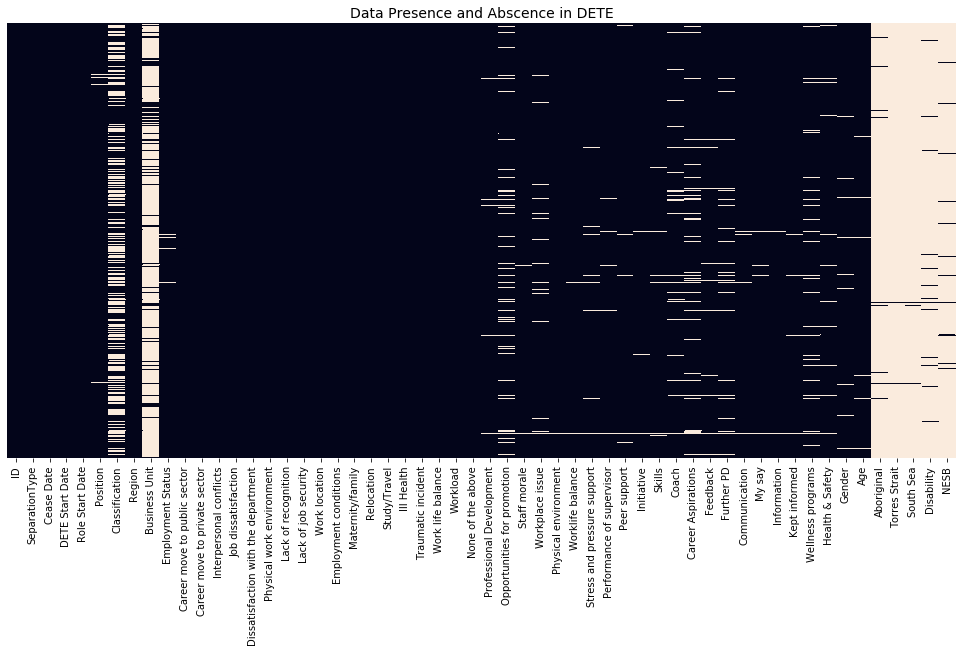

In [4]:
dete_survey.set_index("ID")
fig, ax = plt.subplots(figsize=(17,8))
ax = sns.heatmap(dete_survey.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Data Presence and Abscence in DETE", fontsize=14)
plt.show()

As observed from the DETE heatmap, following columns have least amount of data and are right candidates to be dropped from the dataframe:
    - Classification    - Business Unit    - Aborginal    - Torress Strait    - South Sea    - Disability    - NESB 
    
Following columns show similar distribution of data present and missing, and also are not required for analysis. Hence these columns can also be dropped:
    - Oppurtunities for pormotion    - Coach    - Career Aspirations    - Further PD    - Wellness Programs
    - Health and Safety
    
Several other columns may have more data than missing values, however are not required to derive answers for the above questions.

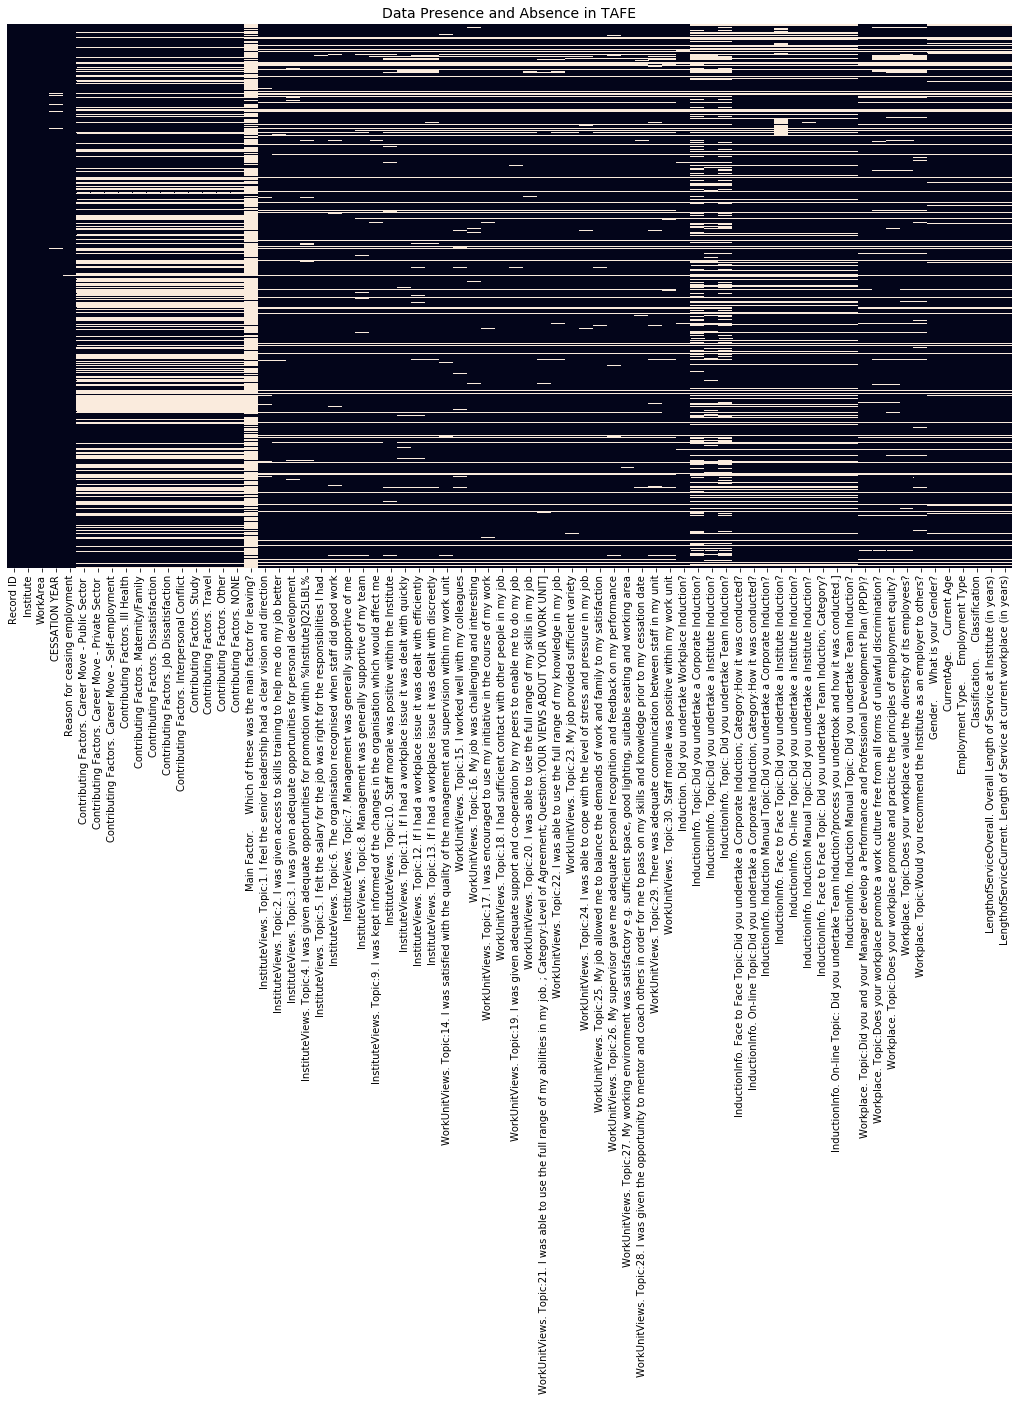

In [5]:
tafe_survey.set_index("Record ID")
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.heatmap(tafe_survey.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Data Presence and Absence in TAFE", fontsize=14)
plt.show()

TAFE dataframe has a different show for missing data. Several chunks of rows have almost no data for all the columns provided.

<b><i>Review unique values in each column of dataframe, to have a glimpse of data captured</i></b>
    - Print unique values in each column to get a glimpse of uniformity and difference in formats of data

In [6]:
dete_cols = dete_survey.columns

# exlude "ID" column from column list
dete_cols = dete_cols[1:] 

# for each column in the list, print the unique values
for each_col in dete_cols:
    print("\033[1m"+each_col+"\033[0m")
    print(dete_survey[each_col].unique(),"\n")

SeparationType
['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination'] 

Cease Date
['08/2012' '05/2012' '07/2012' '2012' '2013' '2014' '2010' '09/2013'
 '07/2013' '08/2013' '06/2013' '04/2013' '05/2013' '09/2010' '01/2014'
 '11/2012' '04/2014' '12/2013' '07/2014' '10/2013' '11/2013' 'Not Stated'
 '09/2014' '07/2006' '02/2014'] 

DETE Start Date
['1984' 'Not Stated' '2011' '2005' '1970' '1994' '1972' '1988' '2009'
 '1997' '1999' '1998' '1967' '2007' '1995' '1996' '2006' '1989' '1982'
 '1980' '1973' '1981' '1974' '1975' '1978' '2003' '2000' '1977' '1976'
 '1985' '2008' '1963' '1993' '1979' '1990' '1969' '1966' '2010' '1968'
 '1991' '1971' '2002' '1986' '2004' '2012' '1983' '2001' '1987' '1992'
 '2013' '1965'] 

Role Start Date
['2004' 'Not Stated' '2011' '2006' '1989' '1997' '2007' '1990' '2009'
 '2008' '1999' '1998' '2000' '20

In [7]:
tafe_cols = tafe_survey.columns

# exclude the "Record Id" column
tafe_cols = tafe_cols[1:]

# for each column in the list, print the unique values
for each_col in tafe_cols:
    print("\033[1m"+each_col+"\033[0m")
    print(tafe_survey[each_col].unique(),"\n")

Institute
['Southern Queensland Institute of TAFE' 'Mount Isa Institute of TAFE'
 'Barrier Reef Institute of TAFE' 'Central Queensland Institute of TAFE'
 'Brisbane North Institute of TAFE' 'Southbank Institute of Technology'
 'Tropical North Institute of TAFE' 'Sunshine Coast Institute of TAFE'
 'The Bremer Institute of TAFE' 'Wide Bay Institute of TAFE'
 'Metropolitan South Institute of TAFE' 'SkillsTech Australia'] 

WorkArea
['Non-Delivery (corporate)' 'Delivery (teaching)'] 

CESSATION YEAR
[2010. 2009.   nan 2011. 2012. 2013.] 

Reason for ceasing employment
['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan] 

Contributing Factors. Career Move - Public Sector 
[nan '-' 'Career Move - Public Sector'] 

Contributing Factors. Career Move - Private Sector 
[nan '-' 'Career Move - Private Sector'] 

Contributing Factors. Career Move - Self-employment
[nan '-' 'Career Move - Self-employment'] 

Contributing Factors. Ill Health
[nan 

<b>Preliminary Observations</b>

- Some of the column names in both dataframes are common or similar.
- Some of the column names are too long with repeating headings/classifiers.
- There are many columns with more than half the rows with missing values.
- Certain columns have missing values represented by fillers/literals such as "Not stated", "-"(hypen) etc.
- Columns such as "Cease Date", "Cessation Year" and "Current Age" have values in different formats or with extra literals.
- The survey response columns in DETE and TAFE have different values for the same response types.
                For example: DETE >> sa and TAFE >> "Strongly Agree"

> ***Conclusion*** : Based on the assumed questions, columns which provide info about tenure of employment, factors leading to dissatisfaction and age of employees are most relevant from the dataframes and rest of columns can be dropped or ignored from analysis.

***Observations given as guided project worklow***

- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

<h3>Section 2 - Recreate dataframes with substitution for missing values</h3>
    
    - Replace "Not Stated" in DETE dataframe with NaN

In [8]:
# read missing values as NaN-values into dataframe
dete_survey = pd.read_csv("dete_survey.csv", encoding="ascii", na_values="Not Stated")

# last 5 rows of DETE datset
dete_survey.tail()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,A,A,SA,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,N,N,N,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,A,N,A,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,A,N,A,Female,41-45,NaN,NaN,NaN,NaN,NaN
821,823,Resignation-Move overseas/interstate,12/2013,NaN,NaN,Teacher Aide,NaN,Metropolitan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b><i>Drop columns that are not required as part of analysis</i></b>

In [9]:
print("Shape of Dataframes before dropping columns:")
print("DETE: Rows ",dete_survey.shape[0]," | Columns ",dete_survey.shape[1])
print("TAFE: Rows ",tafe_survey.shape[0]," | Columns ",tafe_survey.shape[1],"\n")

# drop columns that are not required for analysis of exit survey
dete_survey_updated = dete_survey.drop(columns = dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(columns = tafe_survey.columns[17:66], axis=1)

print("Shape of Dataframes after dropping columns:")
print("DETE: Rows ",dete_survey_updated.shape[0]," | Columns ",dete_survey_updated.shape[1])
print("TAFE: Rows ",tafe_survey_updated.shape[0]," | Columns ",tafe_survey_updated.shape[1])

Shape of Dataframes before dropping columns:
DETE: Rows  822  | Columns  56
TAFE: Rows  702  | Columns  72 

Shape of Dataframes after dropping columns:
DETE: Rows  822  | Columns  35
TAFE: Rows  702  | Columns  23


The columns which captured the survey responses, i.e. questionnaire answered by the employees, have been dropped from both the dataframes. This has been done as the analysis needs to be based on age, employment duration, and factors responsible for dissatisfaction.

<b><i>Review updated dataframes using heatmaps</i></b>

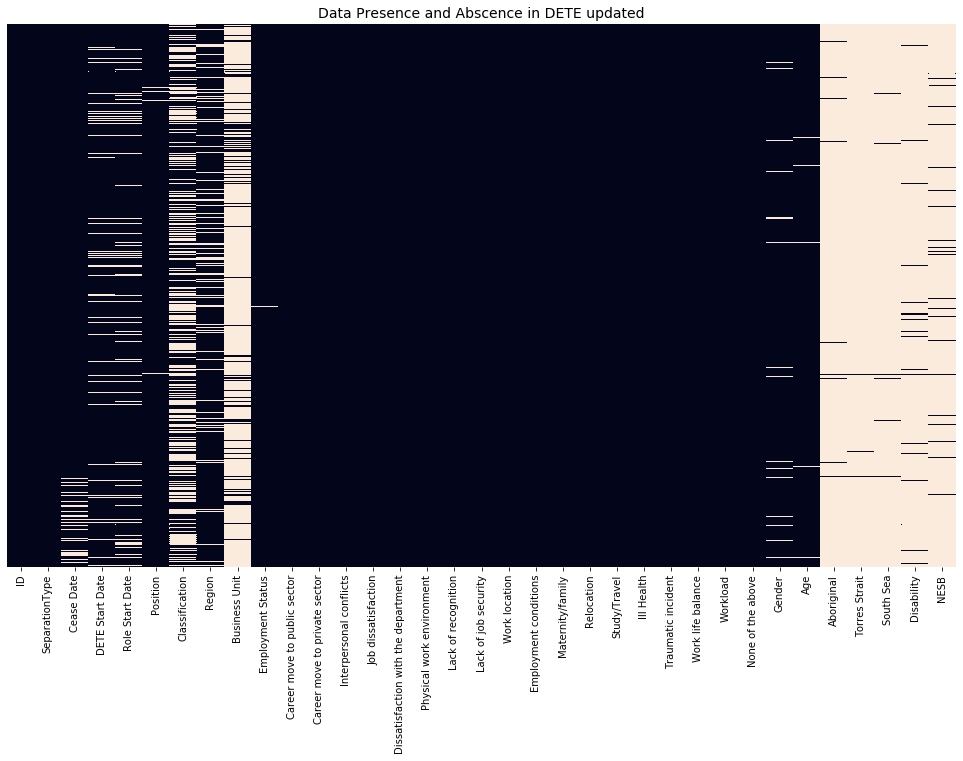

In [10]:
dete_survey_updated.set_index("ID")
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.heatmap(dete_survey_updated.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Data Presence and Abscence in DETE updated", fontsize=14)
plt.show()

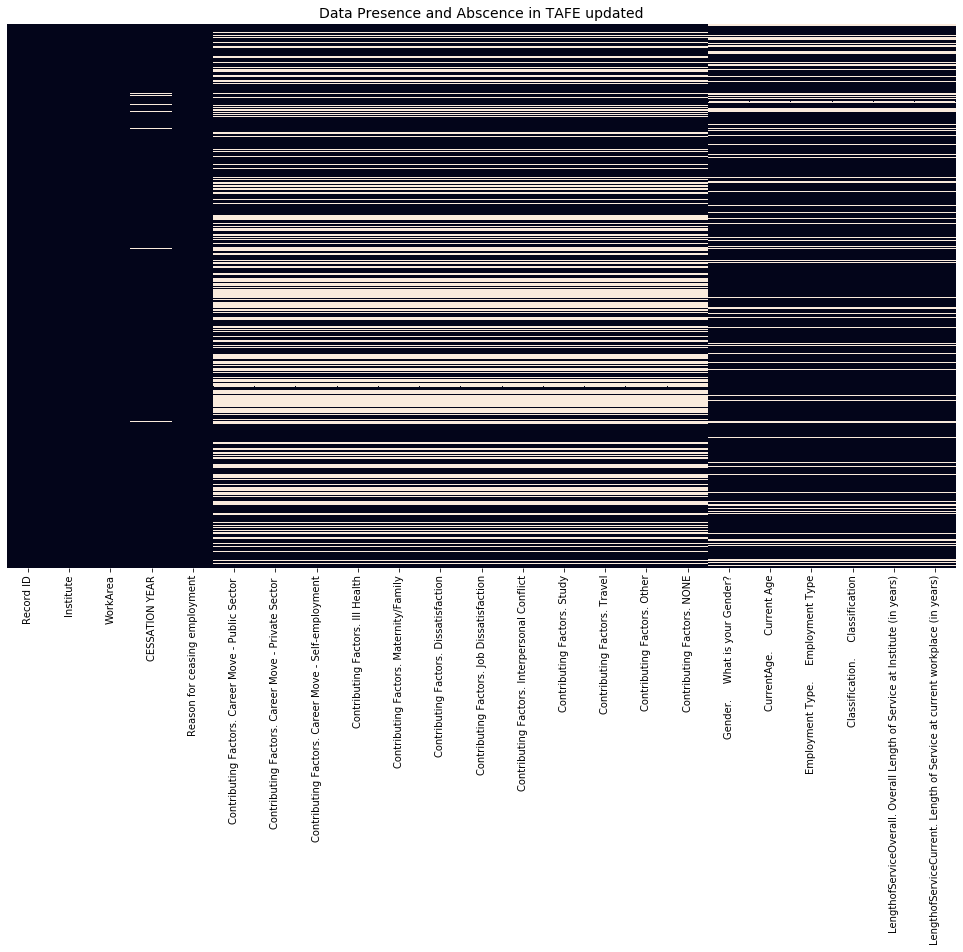

In [11]:
tafe_survey_updated.set_index("Record ID")
fig, ax = plt.subplots(figsize=(17,10))
ax = sns.heatmap(tafe_survey_updated.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Data Presence and Abscence in TAFE updated", fontsize=14)
plt.show()

<h3>Section 3 - Rename and Format column names</h3>

    - Shorten column names that are too long and overworded
    - Remove extra spaces/ literals from column names such as "   ", "." etc.
    - Standardize case for all the column names
    - Replace spaces with underscores for better readability of multi-worded column names

In [12]:
# standardize column names for DETE
dete_survey_updated.columns = dete_survey_updated.columns.str.replace('.', ' ').str.replace('\s+', '_').str.strip().str.lower()

print("\33[1m"+"Cleaned column names in DETE:"+"\33[0m")
print(list(dete_survey_updated.columns))

Cleaned column names in DETE:
['id', 'separationtype', 'cease_date', 'dete_start_date', 'role_start_date', 'position', 'classification', 'region', 'business_unit', 'employment_status', 'career_move_to_public_sector', 'career_move_to_private_sector', 'interpersonal_conflicts', 'job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions', 'maternity/family', 'relocation', 'study/travel', 'ill_health', 'traumatic_incident', 'work_life_balance', 'workload', 'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait', 'south_sea', 'disability', 'nesb']


In [13]:
# remove extra spaces from column names for TAFE
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace("\s+", " ").str.strip()

# rename column names for TAFE
cols_map = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
            'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 
            'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 
            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated.rename(cols_map, axis=1, inplace=True)


print("\33[1m"+"Cleaned column names in TAFE:"+"\33[0m")
print(list(tafe_survey_updated.columns))

Cleaned column names in TAFE:
['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype', 'Contributing Factors. Career Move - Public Sector', 'Contributing Factors. Career Move - Private Sector', 'Contributing Factors. Career Move - Self-employment', 'Contributing Factors. Ill Health', 'Contributing Factors. Maternity/Family', 'Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Interpersonal Conflict', 'Contributing Factors. Study', 'Contributing Factors. Travel', 'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender', 'age', 'employment_status', 'position', 'institute_service', 'role_service']


<h3>Section 4 - Filter and extract data</h3>  

    - Filter datarows having "Resignations" as value for "separationtype" column in TAFE dataframe
        (For TAFE only one type exists >> "Resignations")
        
    - For DETE dataframe, filter and extract, following values from "separationtype" column:
        - Resignation-Other reasons
        - Resignation-Other employer
        - Resignation-Move overseas/interstate
    
    - For DETE dataframe, standardize all resignations types as "Resignation" to have uniform value for "separationtype"       column

In [14]:
# value count for values present in separationtype column in dete dataset

print("\33[1m"+"Reasons for Sepration in DETE"+"\33[0m")
print(dete_survey_updated["separationtype"].value_counts(dropna=False))

Reasons for Sepration in DETE
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [15]:
# value count for values present in separationtype column in tafe dataset

print("\33[1m"+"Reasons for Sepration in TAFE"+"\33[0m")
print(tafe_survey_updated["separationtype"].value_counts(dropna=False))

Reasons for Sepration in TAFE
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


<b><i>Segregate datarows based on separation type: Non-resignations and Resignations</i></b>

In [16]:
# to suppress the UserWarning
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups') 

search_pattern = r"([Rr]esignation)"

dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains(search_pattern) == True]
dete_non_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains(search_pattern) == False]

tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains(search_pattern) == True]
tafe_non_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains(search_pattern) == False]

print(dete_resignations["separationtype"].value_counts(dropna=False),"\n")
print(tafe_resignations["separationtype"].value_counts(dropna=False),"\n")

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64 

Resignation    340
Name: separationtype, dtype: int64 



In [17]:
# to avoide the SettingWithCopyWarning copy() method has been used
dete_resignations = dete_resignations.copy()

# update all the resignation types to one value as "Resignation"
dete_resignations["separationtype"] = dete_resignations["separationtype"].str.split("-").str[0]

print("\33[1m"+"dete resignations total"+"\33[0m")
print(dete_resignations["separationtype"].value_counts())

dete resignations total
Resignation    311
Name: separationtype, dtype: int64


<h3>Section 5 - Cleanse data that is present in inconsistent format</h3>

    - Identify the values in "cease_date" and "dete_start_date" columns that differ from the year values
    - Split and format the values to follow a "YYYY" pattern
    - Visualize the two columns data using a box plot, to identify major outliers 

In [18]:
# value count for all the values in cease_date column in DETE datset including null values
dete_resignations["cease_date"].value_counts(dropna=False).sort_values(ascending=False)

# dete_resignations[dete_resignations["cease_date"].isnull() == True]

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [19]:
# year pattern to be searched
year_pattern = r"([2][0-9]{3})"

# update cease_date values as year extracted
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.extract(year_pattern, expand = False).astype(float).copy()

# recheck value count of years present in cease_date column
dete_resignations["cease_date"].value_counts(dropna=False)

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [20]:
# catch invalid years in dete_start_date column
dete_resignations["dete_start_date"].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

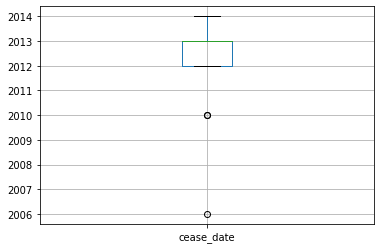

In [21]:
dete_resignations.boxplot(column=["cease_date"])
plt.show()

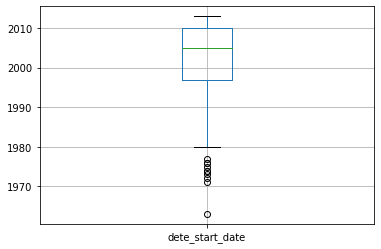

In [22]:
dete_resignations.boxplot(column=["dete_start_date"])
plt.show()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
NaN         5
2009.0      2
Name: cease_date, dtype: int64


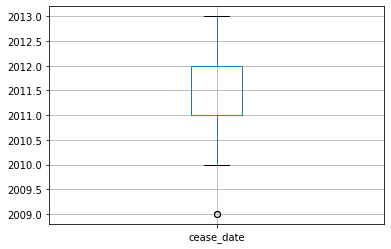

In [23]:
print(tafe_resignations["cease_date"].value_counts(dropna=False))

tafe_resignations.boxplot(column="cease_date")
plt.show()

Based on the results, following are some observations:
* For DETE dataframe, *maximum resignations* happend in the year 2013 and the oldest year in "cease_date" column is 2016.
* "dete_start_date" column does not have any years before 1963 in DETE
* Missing value count in "cease_date" and "dete_start_date" column are 11 and 28 respectively.
* For TAFE dataframe, oldest year is 2009 and year 2011 indicates *maximum resignations*
* 5 values are missing for TAFE.

> **Conclusion** - Since the years are not that far from each other in both the dataframes, all the years have been considered for the analysis.

<h3>Section 6 - Calculate number of years of service</h3>

    - For TAFE dataframe, the column "institute_service" provides information about total service years
    - For DETE dataframe, calculate the years served as difference of "cease_date" and "dete_start_date" columns
    - Label the new column as "institute_service" for DETE dataframe as well

In [24]:
# new column institute_service in dete_resginations with calculated service years
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]

dete_resignations["institute_service"].value_counts(dropna=False).sort_index(ascending=True).head(10)

0.0    20
1.0    22
2.0    14
3.0    20
4.0    16
5.0    23
6.0    17
7.0    13
8.0     8
9.0    14
Name: institute_service, dtype: int64

<h3>Section 7 - Segregate employees who have resigned due to dissatisfication with work</h3>

    - Convert the values present in dissatisfaction columns in each dataset to a bool value "True" or "False"
    
    - Add a new column "dissatisfied" to each of the dataframe to identify the following:
        - True: indicates a person resigned because they were dissatisfied with the job 
        - False: indicates a person resigned because of a reason other than dissatisfaction with the job
        - NaN: indicates the value is missing

In [25]:
# Columns selected for the section (as per guided project)
tafe_diss_cols = ["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]

dete_diss_cols = ["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment", "lack_of_recognition",
                  "lack_of_job_security", "work_location", "employment_conditions", "work_life_balance", "workload"]

In [26]:
print("\33[1m"+"Initial value count for TAFE dataframe dissatisfaction columns"+"\33[0m")
for each_col in tafe_diss_cols:
    print(tafe_resignations[each_col].value_counts(dropna=False),"\n")

# update values present in dissatisfaction columns to True, False and NaN

# define function update_vals to convert dissatisfaction values
def update_vals(vals):
    if pd.isnull(vals) == True:
        return np.nan
    elif vals == "-":
        return False
    else:
        return True
    
# use applymap method to apply the update_vals function to TAFE dissatisfaction columns
tafe_resignations = tafe_resignations.copy()

tafe_resignations[tafe_diss_cols] = tafe_resignations[tafe_diss_cols].applymap(update_vals)

print("\33[1m"+"Updated value count for TAFE dataframe dissatisfaction columns"+"\33[0m")
for each_col in tafe_diss_cols:
    print(tafe_resignations[each_col].value_counts(dropna=False),"\n")

Initial value count for TAFE dataframe dissatisfaction columns
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64 

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64 

Updated value count for TAFE dataframe dissatisfaction columns
False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64 

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64 



In [27]:
# create new column from dissatisfaction columns based on value match
tafe_resignations["dissatisfied"] = tafe_resignations[tafe_diss_cols].any(axis=1, skipna=False)

dete_resignations["dissatisfied"] = dete_resignations[dete_diss_cols].any(axis=1, skipna=False)

print("resigned due to dissatisfaction TAFE:")
print(tafe_resignations["dissatisfied"].value_counts(dropna=False),"\n")
print("resigned due to dissatisfaction DETE:")
print(dete_resignations["dissatisfied"].value_counts(dropna=False),"\n")

resigned due to dissatisfaction TAFE:
False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64 

resigned due to dissatisfaction DETE:
False    162
True     149
Name: dissatisfied, dtype: int64 



In [28]:
# create copy of both datasets as new dataframes
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

print("DETE updated dataframe shape:", dete_resignations_up.shape)
print("TAFE updated dataframe shape:", tafe_resignations_up.shape)

DETE updated dataframe shape: (311, 37)
TAFE updated dataframe shape: (340, 24)


<h3>Section 8 - Combine dataframes DETE and TAFE into one</h3>

    - Combine both dataframes to one
    - Remove the non-essential columns from the combined dataframe
    - Apply aggregation on "institute_service" column to perform analysis by years served

In [29]:
# add additional column to each dataset which marks the dataset as values
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

# combine the datasets DETE and TAFE by row
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, ignore_index=True, sort=False)

print("combined shape:",combined.shape)

combined shape: (651, 53)


In [30]:
# drop columns which have more than 500 null values
combined_updated = combined.dropna(thresh=500, axis=1)

combined_updated.isnull().sum()

id                    0
separationtype        0
cease_date           16
position             53
employment_status    54
gender               59
age                  55
institute_service    88
dissatisfied          8
institute             0
dtype: int64

<h3>Section 9 - Classify duration of service as Experience categories</h3>

    - Modify values in "institute_service" column, as categorical employment duration
    - Classify employment duration in career stages as below:
        - New: Less than 3 years at a company
        - Experienced: 3-6 years at a company
        - Established: 7-10 years at a company
        - Veteran: 11 or more years at a company

In [31]:
#unique values in combined dataset for column institute_service
combined_updated["institute_service"].value_counts().sort_values(ascending=False)

Less than 1 year      73
01-Feb                64
03-Apr                63
05-Jun                33
Nov-20                26
5.0                   23
1.0                   22
07-Oct                21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
10.0                   6
14.0                   6
17.0                   6
12.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
32.0                   3
39.0                   3
19.0                   3
21.0                   3
30.0                   2
28.0                   2
26.0                   2
25.0                   2
36.0                   2
38.0                   1


In [32]:
# correct the values which have month name instead of number range. For example, 01-Feb should be 1-2, Nov-20 should be 11-20

correct_range = {"01-Feb":"1-2", "03-Apr":"3-4", "05-Jun":"5-6", "07-Oct":"7-8", "Nov-20":"11-20"}

combined_updated = combined_updated.copy()
combined_updated["institute_service"] = combined_updated["institute_service"].replace(correct_range)

combined_updated["institute_service"].value_counts(dropna=False).sort_values(ascending=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-8                   21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
14.0                   6
10.0                   6
12.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
26.0                   2
25.0                   2
36.0                   2
30.0                   2
28.0                   2


In [33]:
# exract numeric value from each of the rows of "institute_service" column

combined_updated["institute_service"] = combined_updated["institute_service"].astype(str).str.split("-").str[0].str.extract(r"(\d+)").astype("float")

combined_updated["institute_service"].value_counts(dropna=False).sort_values(ascending=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
6.0      17
20.0     17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
23.0      4
24.0      4
21.0      3
39.0      3
32.0      3
19.0      3
26.0      2
36.0      2
30.0      2
25.0      2
28.0      2
41.0      1
34.0      1
38.0      1
49.0      1
33.0      1
27.0      1
35.0      1
29.0      1
42.0      1
31.0      1
Name: institute_service, dtype: int64

In [34]:
# replace the year number with catergory definitions

# define function which would take each year and convert to experience category
def year_to_cats(year_val):
    if year_val < 3.0:
        return "New"
    elif 3.0 <= year_val <= 6.0:
        return "Experienced"
    elif 7.0 <= year_val <= 10.0:
        return "Established"
    elif pd.isnull(year_val):
        return np.nan
    else:
        return "Veteran"
    
combined_updated["service_cat"] = combined_updated["institute_service"].apply(year_to_cats)

print("Career Stages:")
print(combined_updated["service_cat"].value_counts())

Career Stages:
New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64


<h3>Section 10 - Initial Analysis</h3>

    - Identify relation between % of dissatisfied employees with the duration served at the company

In [35]:
# confirm values in "dissatisfied" column:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [36]:
# fill in "dissatisfied" column
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)

combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

In [37]:
combined_pv = combined_updated.pivot_table(index="service_cat", values="dissatisfied", margins=True)
combined_pv = combined_pv.reset_index()
combined_pv

,service_cat,dissatisfied
0,Established,0.516129
1,Experienced,0.343023
2,New,0.295337
3,Veteran,0.485294
4,All,0.380107


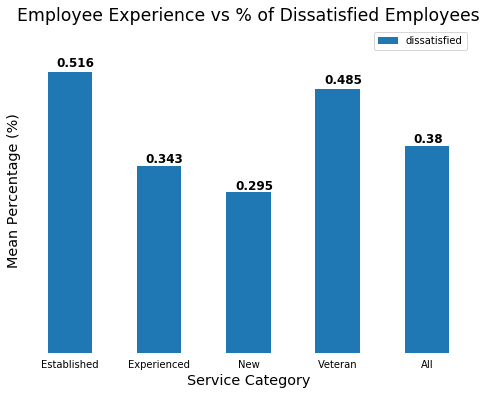

In [38]:
ax = combined_pv.plot(kind="bar", x="service_cat", y="dissatisfied", rot=0, figsize=(8,6), fontsize=10, width=0.5) 

ax.set_xlabel("Service Category", fontsize="x-large")
ax.set_ylabel("Mean Percentage (%)", fontsize="x-large")
ax.set_title("Employee Experience vs % of Dissatisfied Employees", fontsize="xx-large")
ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_ylim(0,0.6)
ax.set_yticks([])

for each_sp in ax.spines:
        ax.spines[each_sp].set_visible(False)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),3)), (p.get_x()+.1, p.get_height()*1.02), fontsize="large", fontweight="demibold")
    
plt.show()

Initial analysis compares the percentage of employees who have resigned due to some dissatisfaction with their job, with the service experience they have had at the company.

Based on these results, it appears that the **maximum resignations** came from employees who have already ***been working for more than 7 years.***

The **next** category with **maximum resignations** due to dissatisfaction came from employees who had been working with the company for ***over a decade.***

> *Answer to first question of the project - Higher number of established and veteran employees have reasoned "Dissatisfaction" with their job as a cause of leaving employment as compared to new employees.*

<h2>Additional Exercises</h2>

<h3>1. Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?</h3>

    - Copy combined_updated dataframe (from initial analysis) to combined_addex dataframe
      (this is to maintain the dataframe with the initial analysis)
    - Visualize the gaps created by missing values in the column "institute_service" using appropriate plot
    - Identify the proportion of datarows with missing values, in comparison to the whole dataframe
    - Apply "Interpolate()" method on "institute_service" column
    - Compare the effects on interpolation on "dissatisfied" % vs the service experience categories

In [39]:
# copy combined_updated dataframe to combined_addex
combined_addex = combined_updated.copy()

# percentage of datarows with missing values in "institute_service" column
print("Does the datarow has missing values?")
print(combined_updated["service_cat"].isnull().value_counts(normalize=True).mul(100).round(2))

Does the datarow has missing values?
False    86.48
True     13.52
Name: service_cat, dtype: float64


The datarows for which "institute_service" column has no data, constitute **13.52%** of total datarows in combined_updated dataframe.

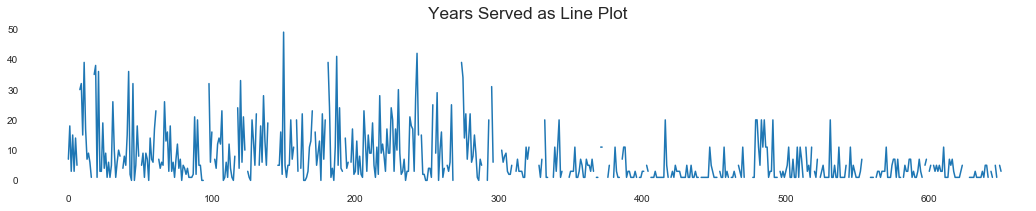

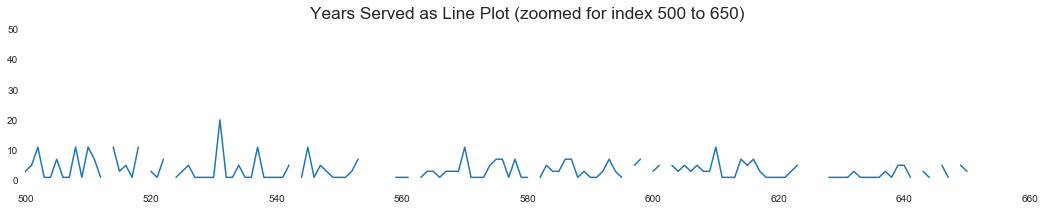

In [40]:
combined_addex["institute_service"].value_counts(dropna=False).sort_values()

sns.set_style("white")

fig, ax = plt.subplots(figsize=(18,3))
ax = combined_addex["institute_service"].plot.line(linewidth=1.5)
ax.set_xlim(-30, 670)
ax.set_title("Years Served as Line Plot", fontsize="xx-large")
for key, each_spine in ax.spines.items():
    each_spine.set_visible(False)
plt.show()

fig, ax = plt.subplots(figsize=(18,3))
ax = combined_addex["institute_service"].plot.line(linewidth=1.5)
ax.set_xlim(500, 660)
ax.set_title("Years Served as Line Plot (zoomed for index 500 to 650)", fontsize="xx-large")
for key, each_spine in ax.spines.items():
    each_spine.set_visible(False)
plt.show()

# the sns.lineplot gives interpolated graph by default
# fig, ax = plt.subplots(figsize=(18,5))
# ax = sns.lineplot(data=combined_updated["institute_service"], palette="tab10", linewidth=2)
# plt.show()

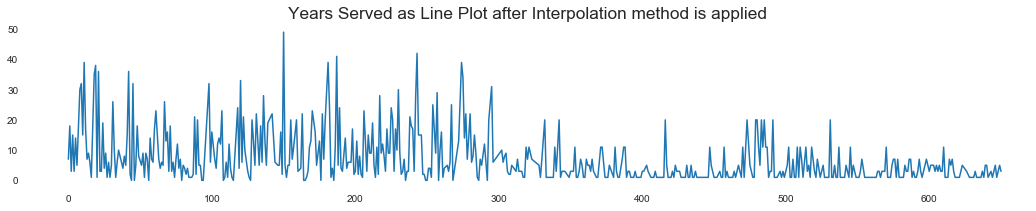

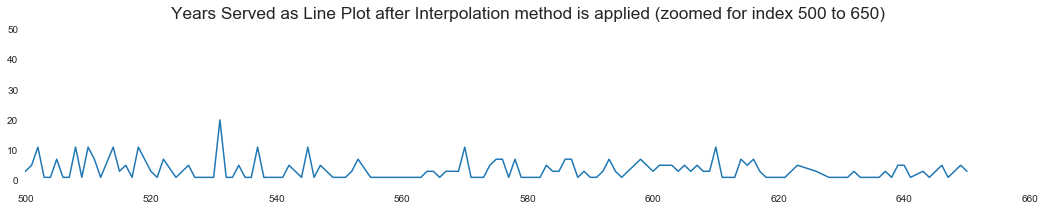

In [41]:
combined_addex["institute_service"] = combined_addex["institute_service"].interpolate()

fig, ax = plt.subplots(figsize=(18,3))
ax = combined_addex["institute_service"].plot.line(linewidth=1.5)
ax.set_xlim(-30, 670)
ax.set_title("Years Served as Line Plot after Interpolation method is applied", fontsize="xx-large")
for key, each_spine in ax.spines.items():
    each_spine.set_visible(False)
plt.show()

fig, ax = plt.subplots(figsize=(18,3))
ax = combined_addex["institute_service"].plot.line(linewidth=1.5)
ax.set_xlim(500, 660)
ax.set_title("Years Served as Line Plot after Interpolation method is applied (zoomed for index 500 to 650)",
             fontsize="xx-large")
for key, each_spine in ax.spines.items():
    each_spine.set_visible(False)
plt.show()

In [42]:
combined_addex["service_cat"] = combined_addex["institute_service"].apply(year_to_cats)

print("Career Stages:")
print(combined_addex["service_cat"].value_counts(dropna=False))

Career Stages:
New            214
Experienced    202
Veteran        163
Established     72
Name: service_cat, dtype: int64


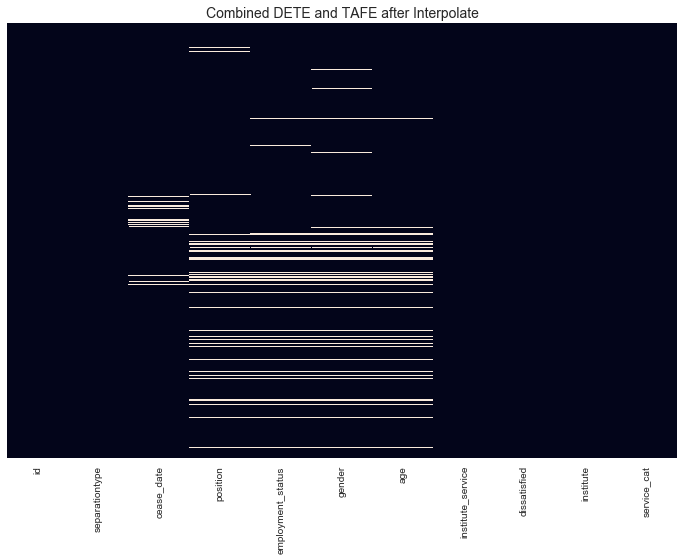

In [43]:
combined_addex.set_index("id")
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(combined_addex.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Combined DETE and TAFE after Interpolate", fontsize=14)
plt.show()

In [44]:
addex_pv = combined_addex.pivot_table(index="service_cat", values="dissatisfied", margins=True)
addex_pv = addex_pv.reset_index()

combine_addex = pd.concat([combined_pv,addex_pv], keys=("Combined","Add-Ex"), ignore_index=False, sort=False)
combine_addex = combine_addex.reset_index()

combine_addex = combine_addex.drop(columns=["level_1"])
combine_addex = combine_addex.rename(columns={"level_0":"dataset"})
combine_addex

,dataset,service_cat,dissatisfied
0,Combined,Established,0.516129
1,Combined,Experienced,0.343023
2,Combined,New,0.295337
3,Combined,Veteran,0.485294
4,Combined,All,0.380107
5,Add-Ex,Established,0.472222
6,Add-Ex,Experienced,0.336634
7,Add-Ex,New,0.299065
8,Add-Ex,Veteran,0.453988
9,Add-Ex,All,0.368664


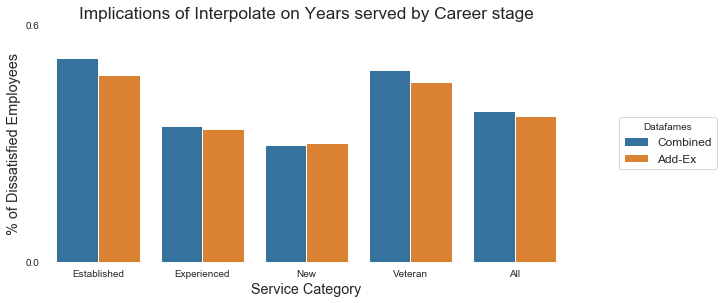

In [45]:
sns.catplot(kind="bar", x="service_cat", y="dissatisfied", hue="dataset", data=combine_addex,
                 margin_titles=True, height=4, aspect=2, saturation=.7, legend=False,  legend_out=True)
sns.despine(top=True, left=True, right=True, bottom=True)

plt.title("Implications of Interpolate on Years served by Career stage", fontsize="xx-large")

plt.xlabel("Service Category", fontsize="x-large")
plt.ylabel("% of Dissatisfied Employees", fontsize="x-large")

plt.ylim([0,0.6])
plt.yticks([0,0.6])

plt.legend(loc="center right", bbox_to_anchor=(1.3, 0.5), title="Datafames", fontsize="large")

plt.show()

The comparison chart, shows that interpolation has caused the % of dissatisfied employees to decrease for all the career stages except for "New" employees, although the increase is nominal.

Following table shows, the difference in % of dissatisfied employees for each career stage:

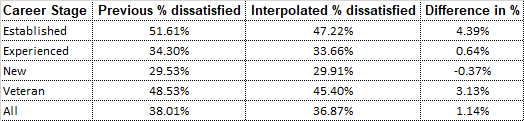

<h3>2. Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?</h3>

    - Remove spaces/ extra characters from "age" column in combined_addex dataframe
    - Replace the "age" column values which do not have proper range format
        > For exmple: 56 or older to 56-60 since the last data value is 60 or older
    - Calculate count of employees in each age group who have resigned from employment due to dissatisfaction
    - Identify the age-group which has the maximum count of resignations
    - Visualize the number of resignations for each age-group
    
    - Calculate count of employees in each career stage, for each age group who have resigned from employment due to                      dissatisfaction
    - Visualize number of resignations by career stage for each age-group

In [46]:
combined_addex["age"].value_counts(dropna=False).sort_index()

20 or younger    10
21 – 25          33
21-25            29
26 – 30          32
26-30            35
31 – 35          32
31-35            29
36 – 40          32
36-40            41
41 – 45          45
41-45            48
46 – 50          39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
NaN              55
Name: age, dtype: int64

In [47]:
combined_addex["age"] = combined_addex["age"].str.replace(" – ","-").str.replace("56 or older","56-60")
combined_addex["age"].value_counts(dropna=False).sort_values(ascending=False)

age_pv = combined_addex.pivot_table(index="age", values="dissatisfied", aggfunc=np.sum)
age_pv = age_pv.reset_index()
age_pv

,age,dissatisfied
0,20 or younger,2.0
1,21-25,19.0
2,26-30,28.0
3,31-35,23.0
4,36-40,25.0
5,41-45,35.0
6,46-50,31.0
7,51-55,30.0
8,56-60,21.0
9,61 or older,12.0


As evident from the value count, the employess belonging to age-group <b>"41-45"</b> show <b>maximum resignations.</b>

<b><i>Visualize employee resignations due to dissatisfaction</i></b>

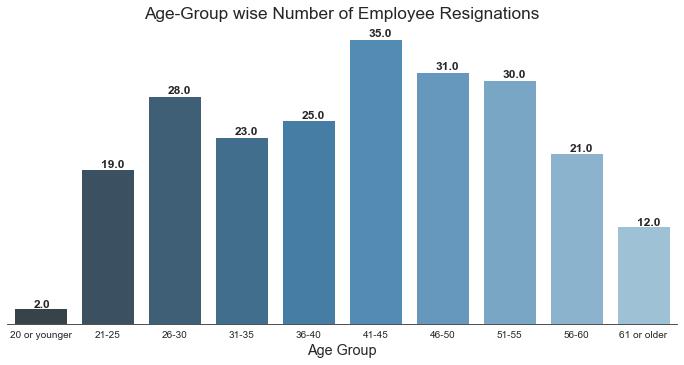

In [48]:
fig,ax = plt.subplots(figsize=(12,5.5))

sns.barplot(ax=ax, x="age", y="dissatisfied", data=age_pv, palette="Blues_d", order=age_pv["age"])
sns.despine(left=True, bottom=False)
ax.set_yticks([])
ax.set_xlabel("Age Group", fontsize="x-large")
ax.set_ylabel("")
ax.set_title("Age-Group wise Number of Employee Resignations", fontsize="xx-large")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+.3, p.get_height()*1.01), fontsize="large", fontweight="demibold")
      
plt.show()

# sns.plotting_context()

In [49]:
age_cat_pv = combined_addex.pivot_table(index=["age", "service_cat"], values="dissatisfied", aggfunc=np.sum)
age_cat_pv = age_cat_pv.reset_index()

age_cat_pv = age_cat_pv.pivot(index="age", columns="service_cat", values="dissatisfied")
age_cat_pv = age_cat_pv.reset_index()
age_cat_pv

service_cat,age,Established,Experienced,New,Veteran
0,20 or younger,NaN,1.0,1.0,NaN
1,21-25,0.0,6.0,11.0,2.0
2,26-30,7.0,13.0,8.0,0.0
3,31-35,9.0,6.0,6.0,2.0
4,36-40,4.0,9.0,8.0,4.0
5,41-45,4.0,12.0,7.0,12.0
6,46-50,4.0,7.0,7.0,13.0
7,51-55,3.0,4.0,7.0,16.0
8,56-60,2.0,3.0,2.0,14.0
9,61 or older,1.0,1.0,NaN,10.0


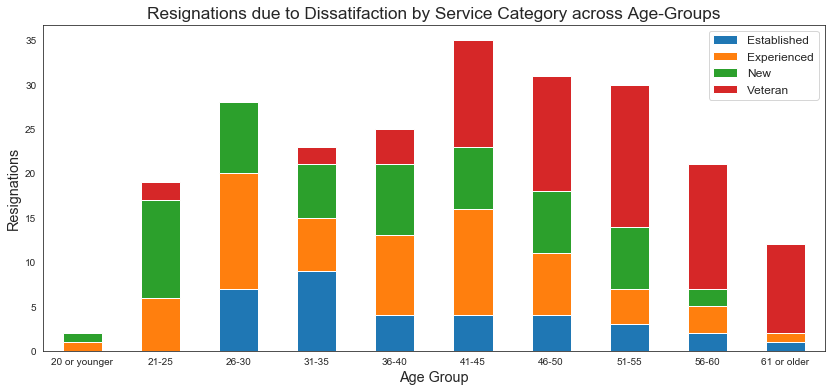

In [50]:
x = age_cat_pv[["age", "Established", "Experienced", "New", "Veteran"]]
y = x.set_index("age")
z = y.groupby("age").sum()

ax = z.plot(kind="bar", stacked=True, figsize=(14,6), width=0.5, rot=0)
ax.legend(loc="upper right", fontsize="large")
ax.set_title("Resignations due to Dissatifaction by Service Category across Age-Groups", fontsize="xx-large")
ax.set_xlabel("Age Group", fontsize="x-large")
ax.set_ylabel("Resignations", fontsize="x-large")

plt.show()

Although the age-group "41-45" show maximum resignations overall, the higher age-groups show maximum number of resignations from the **Veteran** employees.
In the case of new employees, the maximum resignations were given by employess in the age-group 21-25. 

Following chart lists the value projected above (top values have been highlighted):

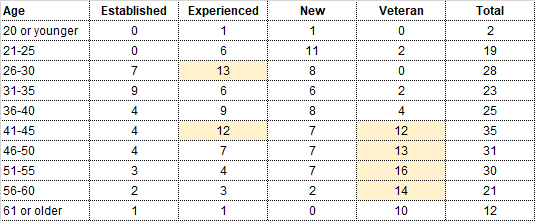

<h3>3. Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?</h3>

    - Visualize share of employee resignations based on dissatisfaction, for each institute

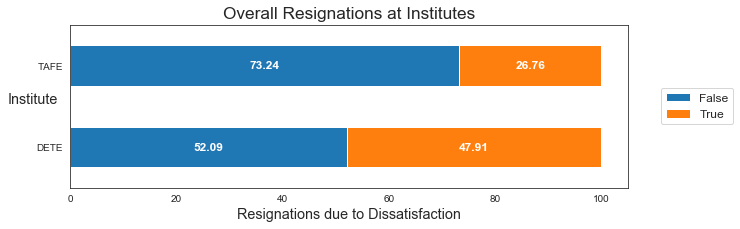

In [51]:
institute_group = combined_addex.groupby("institute")
institute_group = institute_group["dissatisfied"].value_counts(normalize=True).mul(100).unstack()

ax = institute_group.plot(kind='barh', figsize=[10,3], stacked=True, legend=False)

ax.set_ylabel("Institute", fontsize="x-large", rotation=0)
ax.set_xlabel("Resignations due to Dissatisfaction", fontsize="x-large")

ax.legend(loc="center right", bbox_to_anchor=(1.2,0.5), fontsize=12)
ax.set_title("Overall Resignations at Institutes", fontsize="xx-large")
# ax.yaxis.set_tick_params(rotation=0)

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(str(round(width,2)), xy=(left+width/2, bottom+height/2), 
                ha='center', va='center', fontsize=12, color="white", fontweight="demibold")

plt.show()

Comparison between number of resignations between the two datasets, reveal that the maximum resignations (*proportionately to the data for respective dataset*) due to dissatisfactions are in **DETE**.